## Iris Data Classification
This project consists of data analysis and prediction on iris dataset where the flowers are classified into their types based on their features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

###  Dataset:

* sepal length (cm)
* sepal width (cm)
* petal length (cm)
* petal width (cm)
* "target" class of flowers

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [4]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [5]:
iris_data.shape

(150, 5)

In [6]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


In [7]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
iris_data.isnull().sum()
# which means data is already clean

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

#### Initializing index values for each column in iris_data

In [9]:
sepal_length_index = 0
sepal_width_index = 1
petal_length_index = 2
petal_width_index = 3

### Sepal length vs width graph is plotted.

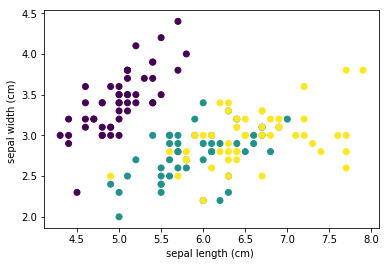

In [10]:
plt.scatter( x = iris.data[:, sepal_length_index],  y = iris.data[:, sepal_width_index], c = iris.target)
plt.xlabel("sepal length (cm) ")
plt.ylabel("sepal width (cm) ")
plt.show()

###  Petal length vs width graph is plotted.

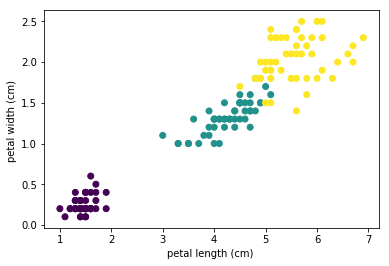

In [11]:
plt.scatter( x = iris.data[:, petal_length_index],  y = iris.data[:, petal_width_index], c = iris.target)
plt.xlabel("petal length (cm) ")
plt.ylabel("petal width (cm) ")
plt.show()

### Splitting the dataset for training and testing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(iris_data.iloc[:, 0:4], iris_data["target"], test_size = 0.3)

In [14]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(105, 4) (105,) (45, 4) (45,)


### Implementing model training using the training data
* Model used is Random Forest Classifier
* Training data is fit into the classifier to get the predictions 

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
RFCModel = RandomForestClassifier()

In [21]:
RFCModel.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
prediction = RFCModel.predict(x_test)

### Evaluation

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         8
         1.0       0.77      1.00      0.87        17
         2.0       1.00      0.75      0.86        20

   micro avg       0.89      0.89      0.89        45
   macro avg       0.92      0.92      0.91        45
weighted avg       0.91      0.89      0.89        45



### Final Results

* Precision = 96%
* Recall = 96%
* F1-score = 96%